In [1]:
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
stocks = input("Enter the code of the stock:- ")
data = yf.download(stocks, "2008-01-01", "2022-01-18", auto_adjust=True)
data.head()


Enter the code of the stock:- NG=F
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [5]:
data.shape

(3534, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3534 entries, 2008-01-02 to 2022-01-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3534 non-null   float64
 1   High    3534 non-null   float64
 2   Low     3534 non-null   float64
 3   Close   3534 non-null   float64
 4   Volume  3534 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 165.7 KB


In [9]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [8]:
data.describe()

,Open,High,Low,Close,Volume
count,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000
mean,3.718531,3.794443,3.638683,3.712444,131470.948217
std,1.784869,1.821065,1.743645,1.779840,54384.151763
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.704250,2.751000,2.653250,2.702000,92246.500000
50%,3.273500,3.337000,3.213000,3.266500,126669.500000
75%,4.166000,4.254000,4.080250,4.160750,161713.250000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


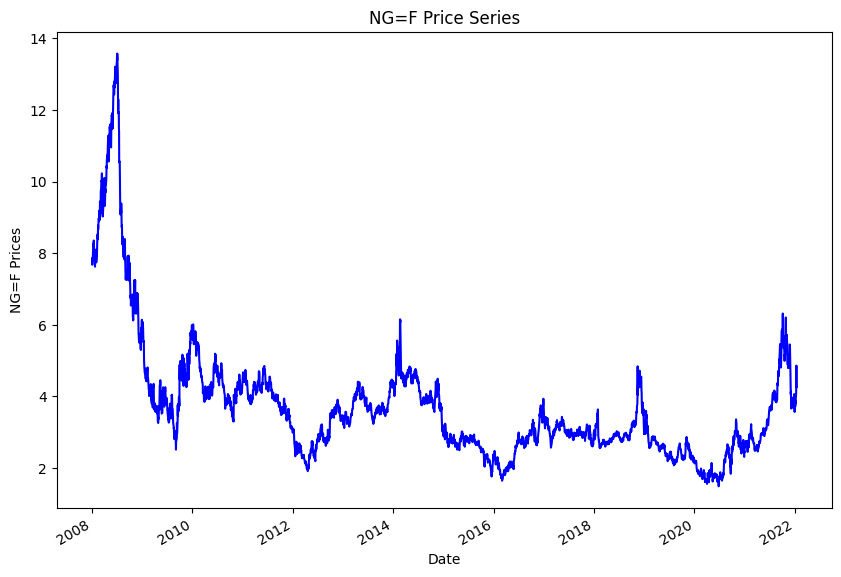

In [10]:
data.Close.plot(figsize=(10,7),color='b')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

<ipython-input-12-7576e4f36f65>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<Axes: xlabel='Close', ylabel='Density'>

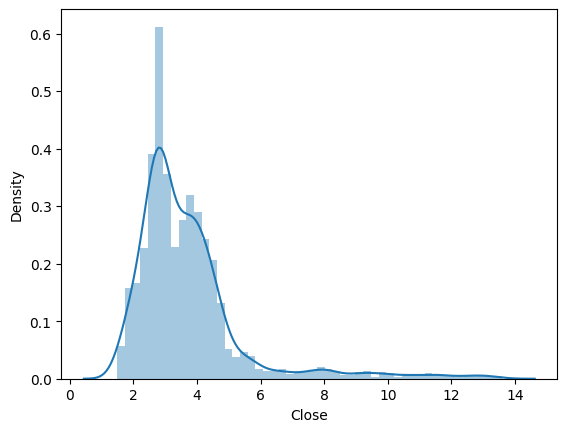

In [12]:
sns.distplot(data["Close"])

<ipython-input-13-daae21fed2ea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])


<Axes: xlabel='Open', ylabel='Density'>

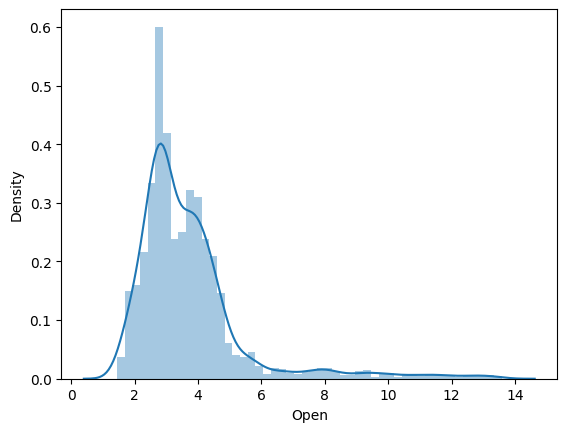

In [13]:
sns.distplot(data["Open"])

<ipython-input-14-f105f0b633a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["High"])


<Axes: xlabel='High', ylabel='Density'>

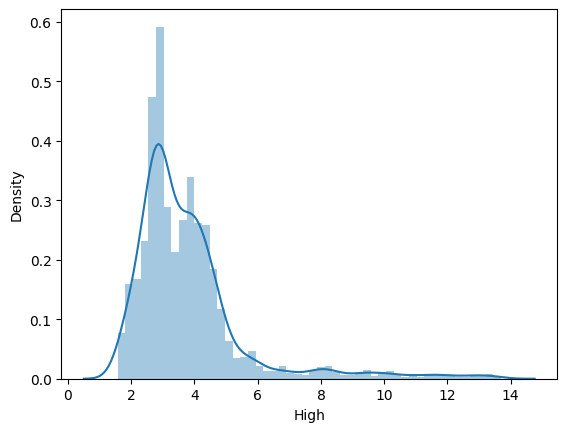

In [14]:
sns.distplot(data["High"])

In [15]:
X=data.drop("Close",axis=1)
y=data["Close"]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2827, 4) (707, 4) (2827,) (707,)


In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
pred1=lr.predict(X_test)


In [21]:
pred1

array([ 3.29238346,  3.02377413,  2.92614292,  2.69545134,  4.43367111,
        4.88166174,  4.67017742,  2.65892571,  4.64025501,  2.83953219,
        1.68509377,  2.2928481 ,  2.10788427,  3.7417527 ,  2.68051795,
        5.61053656,  4.35043013,  3.29313104,  3.97963316,  4.16709369,
        2.85344249,  3.94996425,  5.48156274,  1.82668014,  3.1713288 ,
        5.42876929, 13.04752616,  3.8922446 ,  2.13741086,  4.14294339,
        9.89904519,  3.13856334,  1.84579058,  2.71767174,  3.8471505 ,
        3.58065901,  2.3517371 ,  3.98840282,  3.85044282,  3.99717347,
        2.99716588,  2.68813343,  2.34368906,  3.73633344,  4.96631683,
        2.59052989,  2.60463908,  4.39564351,  4.04390398,  3.87705715,
        4.5356151 ,  3.35129805,  3.34968543,  2.94332596,  3.35333303,
        4.4964752 ,  5.04676071,  4.61394327,  4.50713373,  2.39699558,
        1.67138662,  6.88503336,  5.73201228,  3.14665957,  6.85131378,
        2.96556377,  9.40134764,  6.71829189, 11.54766952,  2.57

In [22]:
from sklearn.metrics import mean_squared_error,r2_score

def calculate_metrics(y_test,y_pred):
  mse=mean_squared_error(y_test,y_pred)
  rmse=np.sqrt(mse)
  r2_sc=r2_score(y_test,y_pred)
  print("MSE:- ", mse)
  print("RMSE:- ", rmse)
  print("R2_score:- ", r2_sc)

In [24]:
calculate_metrics(y_test,pred1)

MSE:-  0.0020253920009987176
RMSE:-  0.045004355355884366
R2_score:-  0.9992899194332998


In [25]:
from sklearn.linear_model import Lasso,Ridge

In [26]:
la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train )


In [29]:
la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

In [30]:
calculate_metrics(y_test, la_p)

MSE:-  0.2926610454130496
RMSE:-  0.5409815573686867
R2_score:-  0.8973961974395565


In [31]:
calculate_metrics(y_test,ri_p )

MSE:-  0.002086189395383772
RMSE:-  0.04567482233554688
R2_score:-  0.9992686045232786


In [32]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR()


param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.077 total time=   0.6s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.053 total time=   0.6s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.061 total time=   0.6s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.068 total time=   0.6s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.044 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.077 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.052 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.060 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.067 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.044 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.076 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [33]:
svr = SVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [34]:
import joblib

joblib.dump(ri, 'model.pkl')

ridge_from_joblib = model = joblib.load("model.pkl")